# **Emisiones de CO2 (toneladas métricas per cápita)**

---



<a href="https://colab.research.google.com/github/AndreesFernandes/Proyecto_Final-BD-ML-/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuración Inicial y Bibliotecas para Análisis de Datos y Machine Learning**

---




In [2]:
# Manejo de Datos y Análisis
import pandas as pd
import geopandas as gpd

# Machine Learning y Preprocesamiento
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Visualización de Datos
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Otros
import warnings
from google.colab import drive

# Configuraciones
warnings.filterwarnings("ignore")  # Eliminamos posibles advertencias
drive.mount('/content/drive')


Mounted at /content/drive


# **Carga y Limpieza de Datos**

---



In [3]:
# Cargamos el CSV en un DataFrame
df = pd.read_csv("/content/drive/MyDrive/API_EN.ATM.CO2E.PC_DS2_es_csv_v2_6229363.csv", skiprows=1, header=1)

# Eliminamos columnas completamente vacías para depurar el DataFrame
df = df.dropna(axis=1, how='all')

# Eliminamos filas sin nombre de país para asegurar la calidad de los datos
df = df.dropna(subset=[df.columns[0]])

# Eliminamos columnas redundantes para simplificar el DataFrame
columnas_redundantes = ["Indicator Name", "Indicator Code"]
df = df.drop(columnas_redundantes, axis=1)

# Eliminamos filas sin datos en los años de muestreo para mantener solo registros relevantes
df = df.dropna(subset=df.columns[2:], how='all')

# Mostramos el DataFrame resultante para verificar las modificaciones realizadas
df


,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afganistán,AFG,0.191389,0.180674,0.126517,0.109106,0.096638,0.088781,0.082267,0.075559,...,0.408965,0.335061,0.298088,0.283692,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479
4,Angola,AGO,0.554941,0.545807,0.544413,0.710961,0.839266,0.914265,1.073630,1.086325,...,0.983787,0.947583,1.031044,1.091497,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743
5,Albania,ALB,1.844035,1.261054,0.689644,0.644008,0.649938,0.612055,0.621206,0.469831,...,1.768109,1.565921,1.656390,1.795712,1.665219,1.590069,1.880557,1.854642,1.749462,1.544550
6,Andorra,AND,7.592152,7.336725,7.099907,6.937048,6.663237,6.754132,7.082732,7.194088,...,6.957586,6.862293,6.674233,6.445931,6.485769,6.465288,6.302098,6.594057,6.287204,5.777148
7,El mundo árabe,ARB,2.799502,2.749432,2.911979,3.052821,3.149926,3.167200,3.202337,3.280785,...,4.209484,4.401209,4.386231,4.439511,4.450525,4.402999,4.350684,4.222333,4.181158,3.929078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,0.529176,0.579131,0.606011,0.656505,0.597318,0.666659,0.744144,0.723075,...,0.998212,0.999879,0.983800,1.027474,1.141125,1.200230,1.229109,1.185974,1.315212,0.960782
262,"Yemen, Rep. del",YEM,0.496616,0.611585,0.632544,0.570608,0.600495,0.654007,0.649987,0.680397,...,0.900866,0.801288,1.031167,0.988347,0.475240,0.342802,0.322370,0.368614,0.354864,0.308515
263,Sudáfrica,ZAF,6.209373,5.922276,5.717823,5.795258,5.826213,6.007616,6.136002,6.372629,...,7.808054,8.034649,8.116435,8.191153,7.607189,7.544590,7.683708,7.667377,7.688908,6.687563
264,Zambia,ZMB,0.356578,0.364978,0.352722,0.304005,0.252979,0.245217,0.197921,0.250242,...,0.213847,0.273340,0.278215,0.297755,0.305055,0.316995,0.393726,0.440527,0.414336,0.401903


# **Creación de DataFrame Resumido de Emisiones Históricas**

---



In [4]:
# Creamos un DataFrame para el histórico de emisión de CO2
# Seleccionamos las columnas de 'Country Name' y 'Country Code' y calculamos la suma histórica de emisiones
df_head = pd.DataFrame({
    'Country Name': df['Country Name'],
    'Country Code': df['Country Code'],
    'Suma Historica': df.iloc[:, 2:].sum(axis=1)
})

# Ordenamos los países por su suma histórica de emisiones de CO2 en orden descendente
df_head = df_head.sort_values(by='Suma Historica', ascending=False)

# Reiniciamos el índice del DataFrame para reflejar el nuevo orden
df_head = df_head.reset_index(drop=True)

# Mostramos el DataFrame resultante para verificar las modificaciones realizadas
df_head


,Country Name,Country Code,Suma Historica
0,Qatar,QAT,1189.197407
1,Emiratos Árabes Unidos,ARE,772.705560
2,Kuwait,KWT,729.191715
3,Bahrein,BHR,683.835445
4,Luxemburgo,LUX,659.302421
...,...,...,...
232,Níger,NER,2.208312
233,Somalia,SOM,1.933786
234,República Centroafricana,CAF,1.505620
235,"Congo, República Democrática del",COD,1.337004


# **Visualización de Suma Histórica de Emisiones con Mapa de Calor**

---



In [5]:
# Creamos un mapa de calor con Plotly Graph Objects
# Configuramos las propiedades del mapa de calor, incluyendo las localizaciones (códigos de país),
# los valores a representar (suma histórica de emisiones), la escala de colores y la información a mostrar al interactuar
fig = go.Figure(data=go.Choropleth(
    locations=df_head['Country Code'],  # Usamos los códigos de los países para el mapeo
    z=df_head['Suma Historica'],  # Representamos la suma histórica de emisiones
    colorscale="Viridis",  # Seleccionamos la escala de colores
    reversescale=True,  # Invertimos la escala de colores
    text=df_head['Country Code'],  # Mostramos el código del país al interactuar con cada área
    colorbar_title='Suma Historica'  # Título para la barra de colores
))

# Configuramos el diseño del mapa
# Definimos aspectos del diseño como el título, la configuración geográfica y la visualización de fronteras y marcos
fig.update_layout(
    title_text='Suma de valores por país',  # Título del mapa
    geo=dict(
        showframe=False,  # Ocultamos el marco exterior
        showcoastlines=False,  # Ocultamos las líneas costeras
        projection_type='equirectangular'  # Elegimos el tipo de proyección del mapa
    )
)

# Mostramos el mapa
fig.show()


# **Visualización de las 10 Mayores Emisiones Históricas de CO2 por País**

---



In [6]:
# Reducimos el DataFrame a los 10 países con mayores emisiones históricas
df_head = df_head.head(10)

# Extraemos los nombres de los países y sus correspondientes sumas históricas de emisiones de CO2 para realizar los gráficos
Paises = df_head['Country Name'].values
NivelesCO = df_head['Suma Historica']

# Creamos el objeto de figura de Plotly
fig = go.Figure()

# Agregamos un gráfico de barras al objeto figura con los valores extraídos
fig.add_trace(go.Bar(
    x=Paises,
    y=NivelesCO,
    yaxis="y",
    name="Niveles de CO2",
    marker=dict(color="lightblue")
))

# Configuramos títulos y ejes del gráfico
fig.update_layout(
    title="Top 10 emisiones de CO2 (Suma histórica)",
    xaxis=dict(title="Nombre del País"),
    yaxis=dict(title="Niveles de CO2", side="left")
)

# Mostramos el gráfico
fig.show()


# **Selección y Ordenación de Emisiones de CO2 por Intervalos Trienales hasta 2020**

---



In [7]:
# Seleccionamos los años con un intervalo de 3 desde 1990 hasta 2020
años_seleccionados = ["1990", "1993", "1996", "1999", "2002", "2005", "2008", "2011", "2014", "2017", "2020"]

# Incluimos la columna 'Country Name' y los años seleccionados en el DataFrame
df_reducido = df[["Country Name"] + años_seleccionados]

# Ordenamos los datos por las emisiones del último año seleccionado (2020) en orden descendente
df_reducido = df_reducido.sort_values(by='2020', ascending=False)

# Mostramos los 10 países con mayores niveles de emisiones en 2020
df_top = df_reducido.head(12)
df_top


,Country Name,1990,1993,1996,1999,2002,2005,2008,2011,2014,2017,2020
200,Qatar,28.399615,34.183536,39.568269,47.288938,45.564691,45.406087,36.889946,37.979493,37.105034,32.256638,31.726842
22,Bahrein,20.752003,22.773170,22.370361,22.323571,23.013401,22.944027,22.301397,21.465303,23.096571,20.946038,21.976908
31,Brunei Darussalam,12.447314,13.796701,15.765066,13.554710,13.296668,13.610768,20.575035,18.262990,16.993155,16.943078,21.705812
127,Kuwait,17.390733,18.590810,20.917175,24.363983,27.153745,31.274316,28.611506,26.493555,22.749990,21.910401,21.169610
8,Emiratos Árabes Unidos,29.055796,28.615418,30.523276,27.660390,27.285557,27.202544,22.328149,19.431780,21.122774,21.165498,20.252272
182,Omán,6.605232,7.324646,8.770710,9.504065,12.469364,12.330709,15.584294,16.720416,16.558314,15.771797,15.636201
13,Australia,15.437183,15.481705,16.471014,17.737243,18.123211,18.278473,18.239290,17.656055,16.155745,16.148091,14.772658
205,Arabia Saudita,10.709518,11.388958,11.213254,11.400494,12.034045,12.923100,14.203754,15.381398,16.825236,16.077792,14.266585
35,Canadá,15.148969,14.713309,15.592614,16.258473,16.720411,17.027568,16.559426,15.998272,15.852177,15.547195,13.599375
170,América del Norte,18.978058,18.766740,19.177100,19.719693,19.173837,19.225304,18.105563,16.540954,16.019064,14.893768,13.088837


# **Creación de un DataFrame Específico para Países con Altas Emisiones de CO2**

---



In [8]:
# Creamos un nuevo DataFrame con los 10 países con mayores niveles de emisiones de CO2
paises_mayor_co2 = ['Qatar', 'Bahrein', 'Brunei Darussalam', 'Kuwait', 'Emiratos Árabes Unidos', 'Omán', 'Australia', 'Arabia Saudita', 'Canadá', 'América del Norte', 'Estados Unidos', 'Luxemburgo']

# Seleccionamos del DataFrame reducido solo aquellos registros que corresponden a los países en nuestra lista
df_seleccionados = df_reducido[df_reducido['Country Name'].isin(paises_mayor_co2)]

# Mostramos el nuevo DataFrame para verificar los datos de los países seleccionados
df_seleccionados


,Country Name,1990,1993,1996,1999,2002,2005,2008,2011,2014,2017,2020
200,Qatar,28.399615,34.183536,39.568269,47.288938,45.564691,45.406087,36.889946,37.979493,37.105034,32.256638,31.726842
22,Bahrein,20.752003,22.773170,22.370361,22.323571,23.013401,22.944027,22.301397,21.465303,23.096571,20.946038,21.976908
31,Brunei Darussalam,12.447314,13.796701,15.765066,13.554710,13.296668,13.610768,20.575035,18.262990,16.993155,16.943078,21.705812
127,Kuwait,17.390733,18.590810,20.917175,24.363983,27.153745,31.274316,28.611506,26.493555,22.749990,21.910401,21.169610
8,Emiratos Árabes Unidos,29.055796,28.615418,30.523276,27.660390,27.285557,27.202544,22.328149,19.431780,21.122774,21.165498,20.252272
182,Omán,6.605232,7.324646,8.770710,9.504065,12.469364,12.330709,15.584294,16.720416,16.558314,15.771797,15.636201
13,Australia,15.437183,15.481705,16.471014,17.737243,18.123211,18.278473,18.239290,17.656055,16.155745,16.148091,14.772658
205,Arabia Saudita,10.709518,11.388958,11.213254,11.400494,12.034045,12.923100,14.203754,15.381398,16.825236,16.077792,14.266585
35,Canadá,15.148969,14.713309,15.592614,16.258473,16.720411,17.027568,16.559426,15.998272,15.852177,15.547195,13.599375
170,América del Norte,18.978058,18.766740,19.177100,19.719693,19.173837,19.225304,18.105563,16.540954,16.019064,14.893768,13.088837


# **Visualización de las Máximas Emisiones de CO2 en 2020 para Países Seleccionados**

---



In [9]:
# Extraemos los nombres de los países y los niveles de CO2 del año 2020 para realizar los gráficos
Paises = df_seleccionados['Country Name'].values
NivelesCO = df_seleccionados['2020']  # Elegimos el año 2020 para el análisis

# Creamos el objeto de figura de Plotly
fig = go.Figure()

# Agregamos un gráfico de barras al objeto figura con los valores extraídos
fig.add_trace(go.Bar(
    x=Paises,
    y=NivelesCO,
    yaxis="y",
    name="Niveles de CO2",
    marker=dict(color="lightblue")
))

# Configuramos títulos y ejes del gráfico
fig.update_layout(
    title="Emisiones de CO2 (año 2020)",
    xaxis=dict(title="Nombre del País"),
    yaxis=dict(title="Niveles de CO2", side="left")
)

# Mostramos el gráfico
fig.show()


# **Comparación Temporal de Emisiones de CO2 en Países Seleccionados (1990-2017)**

---



In [14]:
# Actualizamos los títulos de los subplots para los años seleccionados cada tres años
años_seleccionados = ["1990", "1993", "1996", "1999", "2002", "2005", "2008", "2011", "2014", "2017", "2020"]
subplot_titles = años_seleccionados

# Creamos el objeto de figura de subplots con 5 filas por 2 columnas para acomodar 10 años
fig = make_subplots(rows=6, cols=2, subplot_titles=subplot_titles)

# Añadimos las trazas para cada año seleccionado
for i, año in enumerate(años_seleccionados, start=1):
    row = (i-1) // 2 + 1
    col = 1 if i % 2 != 0 else 2
    fig.append_trace(go.Scatter(
        x=Paises,
        y=df_reducido[año],
    ), row=row, col=col)

# Configuramos el diseño general del gráfico
fig.update_layout(height=1500, width=1600, title_text="Emisiones de CO2 - 1990/2020")

# Mostramos el gráfico
fig.show()


# **Determinación del Número Óptimo de Clusters para Análisis de K-Means**

---



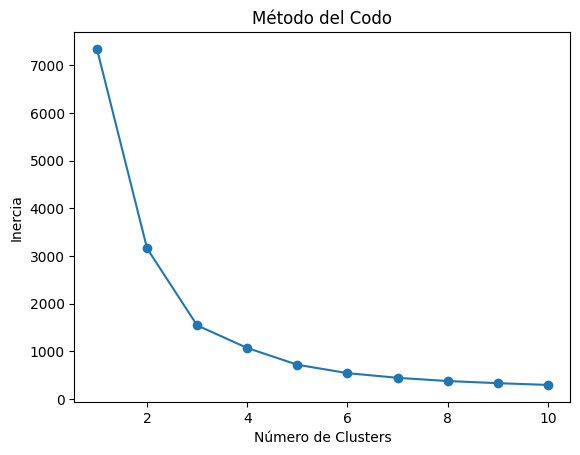

In [21]:
# Preparación de Datos para Clustering
df_cluster = df

# Seleccionamos solo las columnas numéricas (años) para el clustering
datos_cluster = df_cluster.iloc[:, 2:]

# Normalizamos los datos utilizando StandardScaler para asegurar que todas las características contribuyan equitativamente
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_cluster)

# Imputamos los valores faltantes (NaN) con la media de cada columna para manejar los datos faltantes adecuadamente
imputer = SimpleImputer(strategy='mean')
datos_normalizados_imputados = imputer.fit_transform(datos_normalizados)

# Determinación del Número de Clusters
inercias = []

# Probamos diferentes valores de clusters (de 1 a 10) y guardamos la inercia para cada número
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(datos_normalizados_imputados)
    inercias.append(kmeans.inertia_)

# Visualización del Método del Codo
# Graficamos la inercia contra el número de clusters para identificar visualmente el mejor número de clusters
plt.plot(range(1, 11), inercias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


# **Aplicación del Clustering K-Means y Asignación de Etiquetas a los Países**

---



In [22]:
# Aplicación del Clustering K-Means
# Aplicamos el algoritmo K-Means a los datos normalizados e imputados
kmeans = KMeans(n_clusters=4, random_state=42)  # Inicializamos K-Means con 4 clusters
kmeans.fit(datos_normalizados_imputados)  # Ajustamos el modelo a los datos

# Añadimos las etiquetas de los clusters al DataFrame original
# Esto nos permite ver a qué cluster pertenece cada país
df_cluster['Cluster'] = kmeans.labels_

# Visualización de los Resultados del Clustering
# Mostramos los nombres de los países con sus respectivos clusters asignados
print(df_cluster[['Country Name', 'Cluster']])


        Country Name  Cluster
2         Afganistán        3
4             Angola        3
5            Albania        3
6            Andorra        0
7     El mundo árabe        0
..               ...      ...
260            Samoa        3
262  Yemen, Rep. del        3
263        Sudáfrica        0
264           Zambia        3
265         Zimbabwe        3

[237 rows x 2 columns]


# **Evaluación de la Calidad del Clustering con la Puntuación de Silueta**

---



In [23]:
# Evaluación del Clustering con la Puntuación de Silueta
# La Puntuación de Silueta mide qué tan similares son los objetos dentro de su propio cluster
# comparados con los de otros clusters

# Extraemos las etiquetas de los clusters del modelo K-Means
etiquetas_clusters = kmeans.labels_

# Calculamos la Puntuación de Silueta para los datos normalizados e imputados
# y las etiquetas de clusters obtenidas
silueta = silhouette_score(datos_normalizados_imputados, etiquetas_clusters)

# Mostramos la Puntuación de Silueta
# Una puntuación más alta indica una mejor definición de los clusters
print(f'Puntuación de silueta: {silueta}')


Puntuación de silueta: 0.5712497031833175


# **Visualización de Clusters con PCA y Representación de Centroides**

---



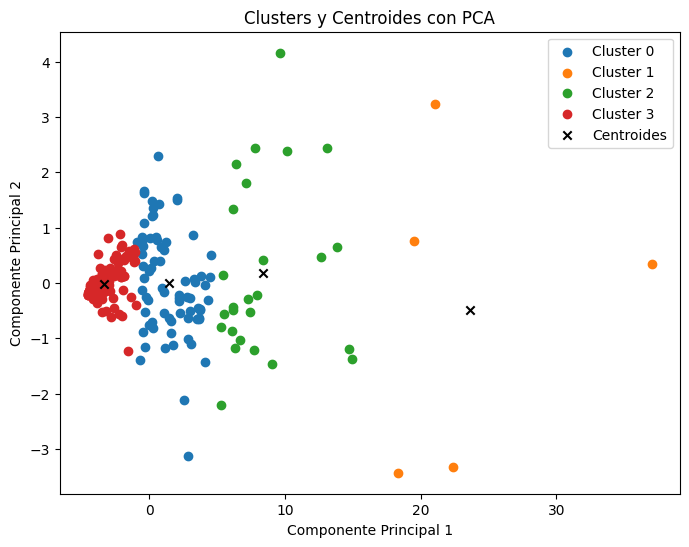

In [27]:
# Aplicación de PCA para Reducción de Dimensionalidad
pca = PCA(n_components=2)  # Inicializamos PCA para reducir a 2 componentes
componentes_principales = pca.fit_transform(datos_normalizados_imputados)

# Visualización de Clusters
plt.figure(figsize=(8, 6))  # Definimos el tamaño del gráfico

# Iteramos sobre los clusters para graficarlos
for cluster in range(4):
    plt.scatter(componentes_principales[df_cluster['Cluster'] == cluster][:, 0],
                componentes_principales[df_cluster['Cluster'] == cluster][:, 1],
                label=f'Cluster {cluster}')  # Graficamos cada cluster

# Graficamos los Centroides de los Clusters
centroides_pca = pca.transform(kmeans.cluster_centers_)  # Transformamos los centroides con PCA
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker='x', color='black', label='Centroides')  # Graficamos centroides

# Configuramos etiquetas y título del gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters y Centroides con PCA')
plt.legend()

# Mostramos el gráfico
plt.show()


# **Visualización de las Medias de Emisiones de CO2 por Cluster a lo Largo del Tiempo**

---



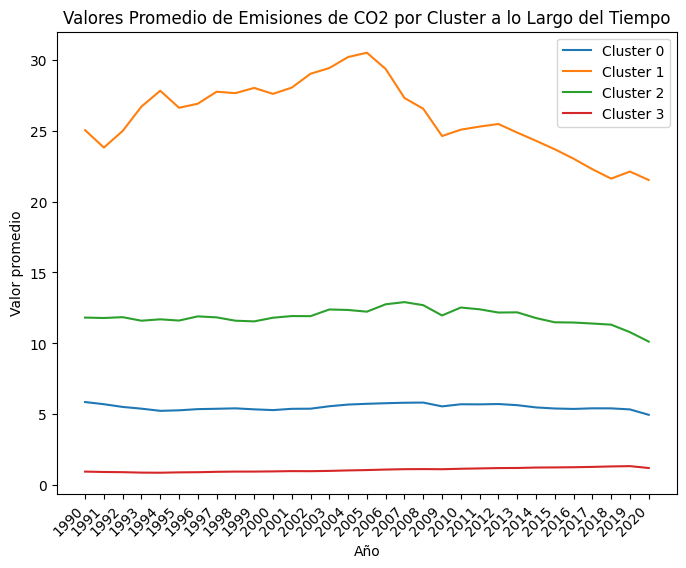

In [30]:
# Cálculo de la Media por Cluster
# Agrupamos el DataFrame por la etiqueta de cluster y calculamos la media para cada grupo
promedio_cluster = df_cluster.groupby('Cluster').mean()

# Visualización de los Valores Medios
plt.figure(figsize=(8, 6))  # Establecemos el tamaño del gráfico

# Iteramos sobre cada cluster para graficar sus valores medios a lo largo del tiempo
for cluster in promedio_cluster.index:
    plt.plot(promedio_cluster.columns, promedio_cluster.loc[cluster], label=f'Cluster {cluster}')

# Configuramos las etiquetas, título y otros aspectos del gráfico
plt.xlabel('Año')
plt.ylabel('Valor promedio')
plt.title('Valores Promedio de Emisiones de CO2 por Cluster a lo Largo del Tiempo')
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje X para mejor legibilidad
plt.legend()

# Mostramos el gráfico
plt.show()


# **Visualización Geográfica de Clusters de Emisiones de CO2**

---



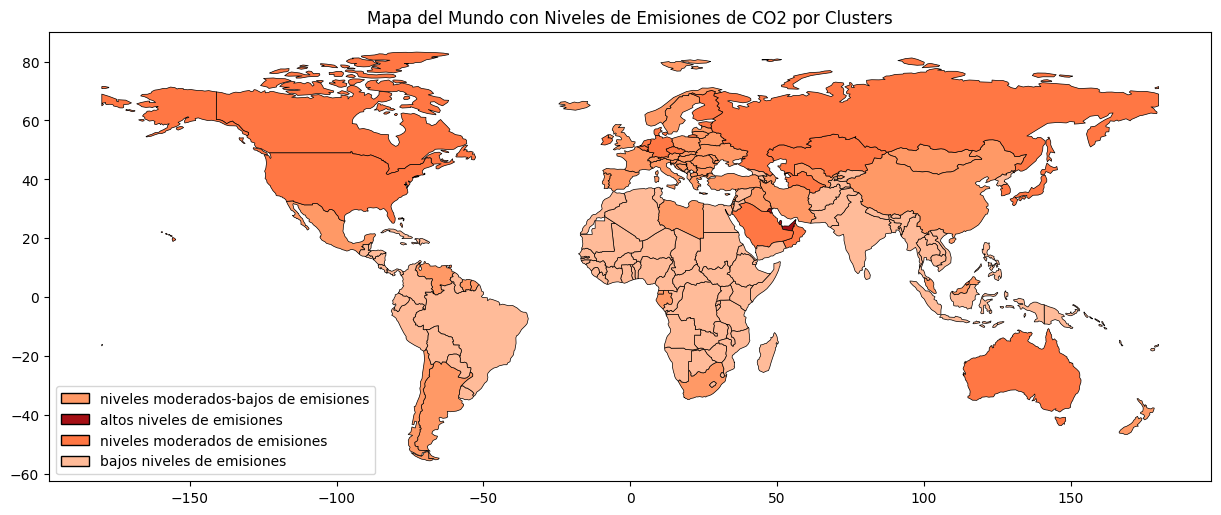

In [31]:
# Definición de Colores y Etiquetas para los Clusters
colors = {
    0: '#FF9966',  # Color para el cluster 0
    1: '#A50F15',  # Color para el cluster 1
    2: '#FF7744',  # Color para el cluster 2
    3: '#FFBB99'   # Color para el cluster 3
}

cluster_labels = {
    0: 'niveles moderados-bajos de emisiones',
    1: 'altos niveles de emisiones',
    2: 'niveles moderados de emisiones',
    3: 'bajos niveles de emisiones'
}

# Carga del Mapa Base del Mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unión de Datos Geográficos con Información de Clústeres
# Combinamos el mapa mundial con los datos de clusters usando un merge
merged = world.merge(df_cluster, how='left', left_on='iso_a3', right_on='Country Code')

# Creación del Mapa del Mundo con Clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for cluster, color in colors.items():
    # Pintamos cada país según el cluster al que pertenece
    merged[merged['Cluster'] == cluster].plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, label=cluster_labels[cluster])

# Creación de la Leyenda Personalizada
legend_elements = [Patch(facecolor=color, edgecolor='black', label=cluster_labels[cluster]) for cluster, color in colors.items()]
ax.legend(handles=legend_elements, loc='lower left')

# Configuración del Título y Visualización del Mapa
plt.title('Mapa del Mundo con Niveles de Emisiones de CO2 por Clusters')
plt.show()
